Πρώτες γραμμές δεδομένων:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97     

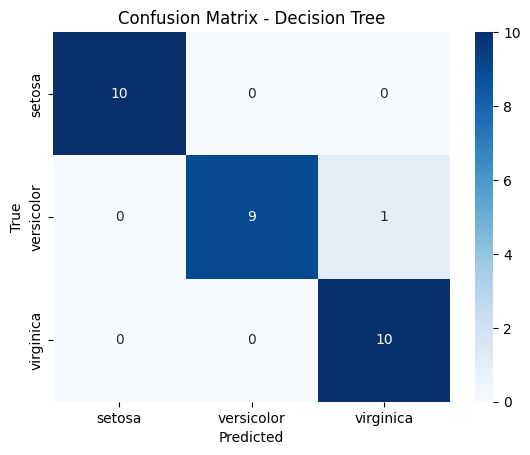

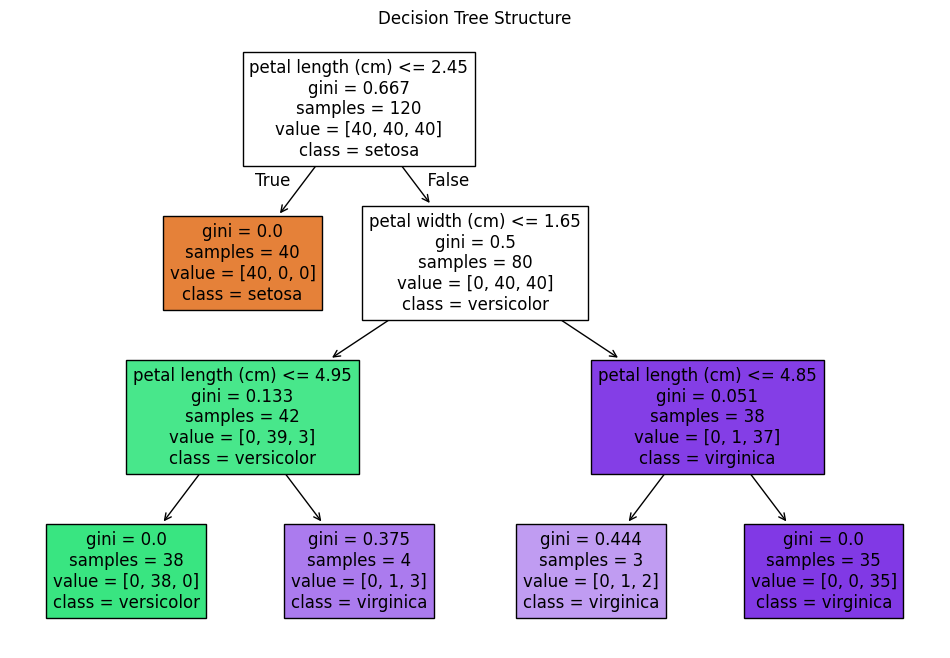

In [3]:
# Day 8 - Decision Tree Classifier (Iris Dataset)

# 1. Εισαγωγή βιβλιοθηκών
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Φόρτωση dataset
iris = load_iris(as_frame=True)
df = iris.frame
print("Πρώτες γραμμές δεδομένων:")
print(df.head())

# 3. Features (X) και target (y)
X = df.drop(columns=["target"])
y = df["target"]

# 4. Split σε train και test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Δημιουργία & εκπαίδευση Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# 6. Predictions
y_pred = clf.predict(X_test)

# 7. Αξιολόγηση
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# 9. Οπτικοποίηση του δέντρου
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()
